# 3 Regression Algorithm and Model Regulation

## 3-1 k-Neighbors Regression

분류문제와 같이 회귀문제도 주위 N개의 이웃들을 선택하고 선택된 이웃들의 평균값을 예측값으로 결정

In [1]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

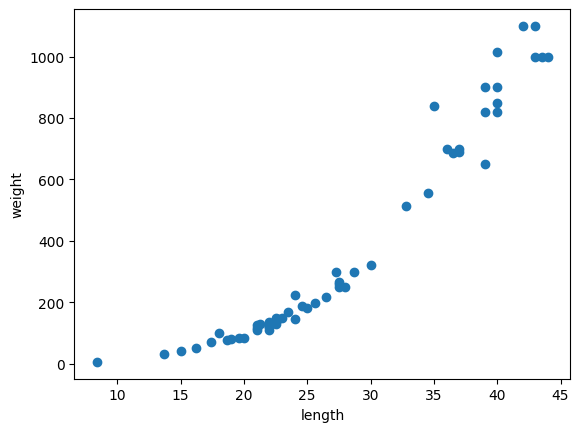

In [2]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)

In [4]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [5]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

knr.fit(train_input, train_target)

KNeighborsRegressor()

In [6]:
print(knr.score(test_input, test_target))

0.992809406101064


### 과소적합과 과대적합

- 훈련세트 점수는 좋은데 테스트 세트 점수가 나쁘다면 과대적합

- 훈련세트보다 테스트 세트의 점수가 높거나 두 점수 모두 낮으면
  - 과소적합

이런 케이스에는 훈련 세트, 테스트 세트 크기 모두 작아서 일어난거일 수도 있음

모델을 조금 더 복잡하게 만드는 방법으로 해결해보자

In [7]:
# 이웃의 갯수를 5 -> 3으로 줄이기

knr.n_neighbors = 3

knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9804899950518966
0.9746459963987609


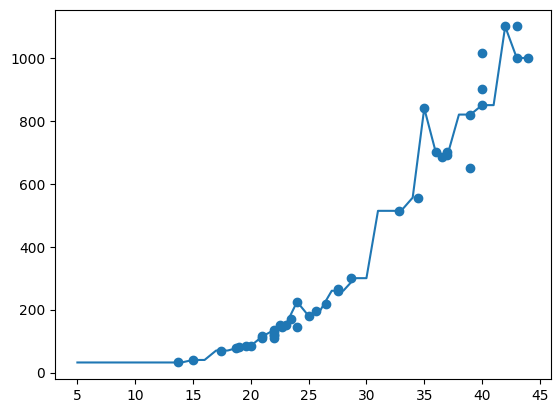

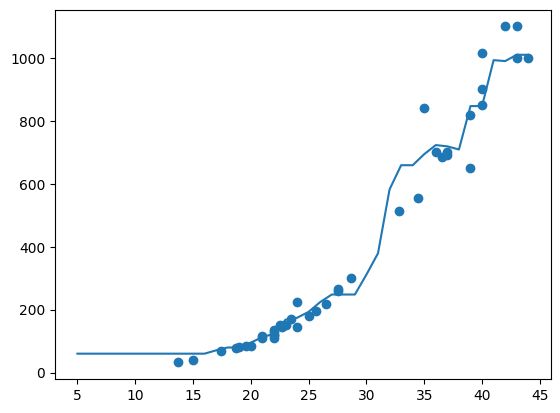

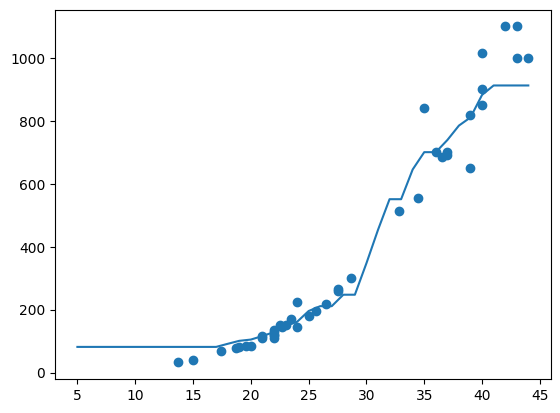

In [8]:
new_knr = KNeighborsRegressor()

x = np.arange(5, 45).reshape(-1, 1)

for n in [1, 5, 10]:
  new_knr.n_neighbors = n
  new_knr.fit(train_input, train_target)

  prediction = new_knr.predict(x)

  plt.scatter(train_input, train_target)
  plt.plot(x, prediction)
  plt.show()

## 선형 회귀

### k-Neighbors 한계

k-neighbors regression은 가장 가까운 샘플을 찾아 타깃 평균 구함

-> 새로운 샘플이 train set 범위 벗어나면 값이 엉뚱하게 예측될 수 있음

-> 선형회귀로 예측

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr = LinearRegression()

In [12]:
lr.fit(train_input, train_target)

LinearRegression()

In [14]:
print(lr.predict([[50]]))

[1241.83860323]


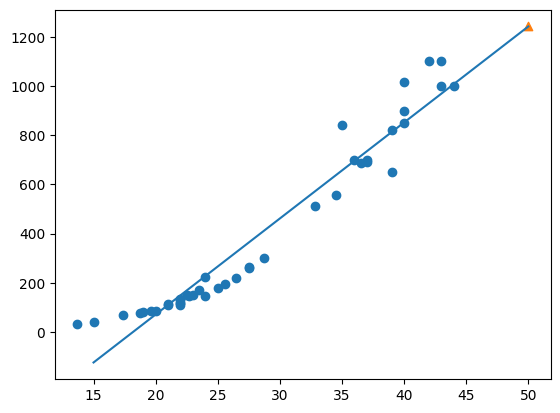

In [15]:
plt.scatter(train_input, train_target)

plt.plot([15, 50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_])

plt.scatter(50, 1241.8, marker='^')
plt.show()

In [16]:
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

In [17]:
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]]))

[1573.98423528]


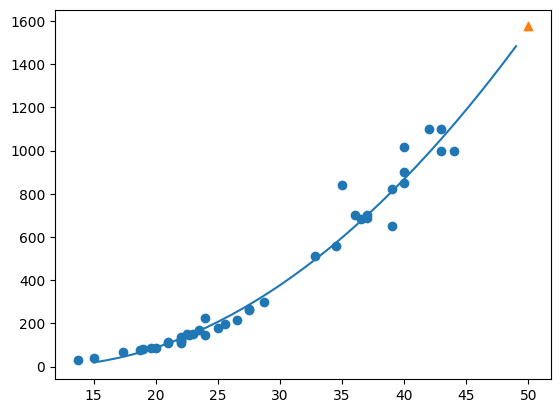

In [18]:
point = np.arange(15, 50)

plt.scatter(train_input, train_target)

plt.plot(point, 1.01 * point ** 2 - 21.6 * point + 116.05)

plt.scatter([50], [1574], marker='^')
plt.show()

## 3-3 특성 공학과 규제

### Motivation

선형회귀는 특성이 많을 수록 엄청난 효과 -> 다양한 변인을 추가해보자

### 특성 공학(Feature Engineering)

기존의 특성들을 활용하여 새로운 특성들을 도출해내는 것

In [19]:
# Pandas로 데이터 읽어오기

import pandas as pd

In [20]:
df = pd.read_csv('https://bit.ly/perch_csv')

In [21]:
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [22]:
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [23]:
train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state=42
)

In [24]:
from sklearn.preprocessing import PolynomialFeatures

In [25]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)

In [26]:
test_poly = poly.transform(test_input)

In [27]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [28]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9903183436982125
0.9714559911594111


In [30]:
poly = PolynomialFeatures(degree = 5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [32]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9999999999996433
-144.40579436844948


### 규제

머신러닝 모델이 훈련세트트 너무 과도하게 학습하지 못하도록 훼방하는 것

### feature scaling

정규화되지 않으면 곱해지는 계수 값도 차이가 나게됨 (use `StandardScaler`)

In [33]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [34]:
# Ridge Regulation
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


### Ridge 규제에서의 하이퍼 파라미터

Rigde, Lasso 규제를 걸 때 규제의 양을 실험을 수행하는 우리가 직접 지정할 수 있음.

모델 객체를 만들 때 alpha 매개변수를 넘겨서 모델의 규제 강도를 조절할 수 있음

이렇게 우리가 모델객체를 미리 만들 때 직접 지정해야 하는 값을 하이퍼파라미터(Hyper Parameter)라 부른다.

In [35]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

In [36]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
  ridge = Ridge(alpha=alpha)
  ridge.fit(train_scaled, train_target)
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

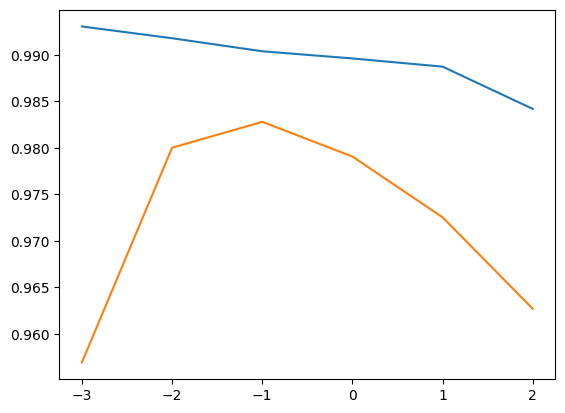

In [37]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [38]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928


### 라쏘 규제의 이점

릿지와 마찬가지로 라쏘 모델도 오버피팅을 잘 억제할 수 있음. 라쏘 모델은 계수의 값을 아예 0으로 만들 수 있는데

이걸 활용하여 정말 유용한 피쳐가 무엇인지 확인 가능